In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython import display
import timeit
from scipy.optimize import least_squares
from scipy.optimize import minimize

# Internal Imports
from data.data_loader import load_kitti, load_malaga, load_parking
from visual_odometry import Visual_Odometry
from visual_odometry_2 import Visual_Odometry_2
from pose import Pose
from plotter import Plotter

np.set_printoptions(precision=2, suppress=True)

In [2]:
kitti = load_kitti()

In [3]:
images = kitti['Images']
K = kitti['K']
homogeneous_pose_mat = kitti['Homogeneous_Pose_Mat']

In [8]:
parking = load_parking()

In [9]:
images = parking['Images']
K = parking['K']
homogeneous_pose_mat = parking['Homogeneous_Pose_Mat']

In [39]:
feature_detector = cv2.SIFT_create()
feature_matcher = cv2.BFMatcher(cv2.NORM_L2, True)

params = {"Feature_Detector": feature_detector,
            "Feature_Matcher": feature_matcher,
            "K": K}

vo = Visual_Odometry_2(params)

vo.bootstrap(images[200], images[202])

print("Inital keypoints:", vo.S.shape[0])

T_l = []
for image in images[201:]:
    T = vo.process_new_frame(image)
    T_l.append(T)
    T_vec = np.array(T_l)[:,:3,3]
    # Plot the image and the keypoints on top subfigure and the x-z trajectory on the bottom subfigure
    # plt.figure(figsize=(10,10))
    # plt.subplot(211)
    # plt.imshow(image)
    # plt.plot(vo.S[:,0], vo.S[:,1], 'r.', markersize=2)
    # plt.plot(vo.C[:,0], vo.C[:,1], 'b.', markersize=2)
    # plt.subplot(212)
    # plt.plot(T_vec[:,0], T_vec[:,2])
    # plt.show()
    # print("Keypoints:", vo.S.shape[0])
    
    # # # Check keypoints outside the image
    # aux = vo.S[:,0] < 0
    # aux += vo.S[:,0] > image.shape[1]
    # aux += vo.S[:,1] < 0
    # aux += vo.S[:,1] > image.shape[0]

    # if aux.any():
    #     print("WARNING - Keypoints outside the image")
    #     print("Keypoints outside the image:", np.sum(aux))

    # print(image.shape)
    # # Clear the plot from inline display
    # display.clear_output(wait=True)






    # plt.imshow(image)
    # plt.plot(vo.S[:,0], vo.S[:,1], 'r.', markersize=2)
    # plt.plot(vo.C[:,0], vo.C[:,1], 'b.', markersize=2)
    # plt.show()
    print("Keypoints:", vo.S.shape[0])
    # # Clear the plot from inline display
    display.clear_output(wait=True)




[[   29.52    -5.45   -33.72]
 [   29.48    -5.25   -33.78]
 [   27.39    -5.05   -36.2 ]
 [   27.5     -5.03   -36.09]
 [   27.6     -5.16   -35.89]
 [   27.59    -4.96   -36.05]
 [   27.31    -4.93   -36.37]
 [   27.09    -5.45   -36.18]
 [   27.21    -5.01   -36.43]
 [   28.53    -4.99   -34.98]
 [   29.44    -5.34   -33.77]
 [   26.4     -5.09   -37.17]
 [   27.6     -5.06   -35.96]
 [   27.11    -4.91   -36.6 ]
 [   27.58    -5.17   -35.72]
 [   26.75    -4.76   -37.09]
 [   27.27    -5.04   -36.34]
 [   29.14    -4.99   -34.19]
 [   27.42    -4.94   -36.26]
 [   29.44    -5.19   -33.89]
 [   29.7     -5.5    -33.43]
 [   27.62    -5.27   -35.8 ]
 [   27.54    -5.26   -35.89]
 [ 2012.58  -247.89   276.09]
 [  122.55    36.13  1020.98]
 [  808.47    50.59   630.11]
 [  710.02  -108.87  1207.08]
 [ 1236.25    20.16   377.72]
 [  -42.91    84.2   -477.67]
 [ 5580.67  -873.6   1022.84]
 [  224.42   -51.03  1374.21]
 [  211.88  -862.38 -1096.3 ]
 [  167.34  -136.03  -206.67]
 [ 1135.08

AssertionError: PnP failed

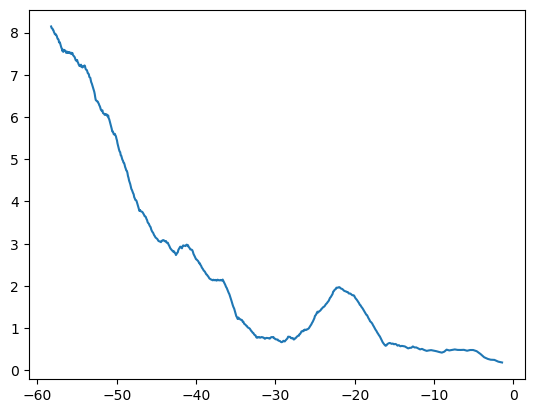

In [25]:
T_vec = np.array(T_l)[:,:3,3]
plt.plot(T_vec[:,0], T_vec[:,2])

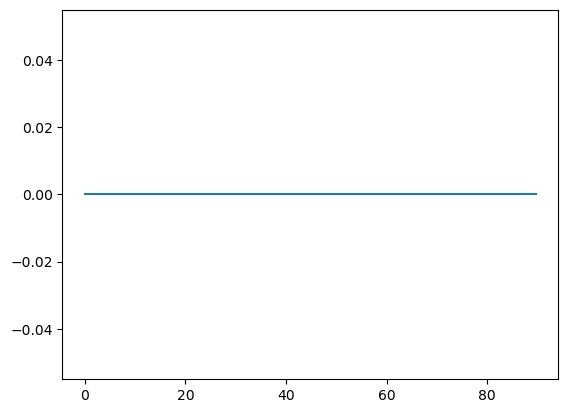

In [21]:
T = homogeneous_pose_mat[:,:3,3]
plt.plot(T[:,0], T[:,2])

In [457]:
T_vec = []
for image in images[2:300]:
    T = vo.process_new_frame(image)
    print(vo.S.shape)
    T_vec.append(T[:3, 3])
    # print(T[:3, 3])



(105, 2)
(507, 2)
(414, 2)
(388, 2)
(369, 2)
(381, 2)
(318, 2)
(440, 2)
(439, 2)
(265, 2)
(440, 2)
(264, 2)
(443, 2)
(413, 2)
(397, 2)
(365, 2)
(400, 2)
(348, 2)
(363, 2)
(368, 2)
(359, 2)
(362, 2)
(333, 2)
(399, 2)
(339, 2)
(396, 2)
(406, 2)
(380, 2)
(406, 2)
(359, 2)
(408, 2)
(375, 2)
(453, 2)
(361, 2)
(436, 2)
(394, 2)
(494, 2)
(505, 2)
(401, 2)
(550, 2)
(359, 2)
(565, 2)
(506, 2)
(526, 2)
(490, 2)
(478, 2)
(533, 2)
(448, 2)
(569, 2)
(527, 2)
(559, 2)
(545, 2)
(620, 2)
(569, 2)
(631, 2)
(554, 2)
(582, 2)
(497, 2)
(497, 2)
(447, 2)
(498, 2)
(402, 2)
(507, 2)
(458, 2)
(483, 2)
(499, 2)
(499, 2)
(461, 2)
(493, 2)
(465, 2)
(465, 2)
(442, 2)
(514, 2)
(351, 2)
(484, 2)
(501, 2)
(450, 2)
(480, 2)
(516, 2)
(529, 2)
(439, 2)
(549, 2)
(408, 2)
(483, 2)
(476, 2)
(512, 2)
(485, 2)
(607, 2)
(489, 2)
(602, 2)
(474, 2)
(641, 2)
(578, 2)
(710, 2)
(673, 2)
(781, 2)
(603, 2)
(808, 2)
(578, 2)
(674, 2)
(551, 2)
(747, 2)
(619, 2)
(782, 2)
(556, 2)
(702, 2)
(734, 2)
(656, 2)
(388, 2)
(641, 2)
(582, 2)
(

AttributeError: 'NoneType' object has no attribute 'ravel'

In [452]:
points_3d = vo.P
points_2d = vo.S

pnp_ransac_params = {"iterationsCount": 100,
                    "reprojectionError": 2.0,
                    "confidence": 0.999,
                    "distCoeffs": None,
                    "flags": cv2.SOLVEPNP_ITERATIVE,
                    "useExtrinsicGuess": False
                    }
# success, R_vec, t, inliers = cv2.solvePnPRansac(points_3d, points_2d, vo.K, None, None, None, False, 100, 8.0, 0.99, None, cv2.SOLVEPNP_ITERATIVE)
success, R_vec, t, inliers = cv2.solvePnPRansac(points_3d, points_2d, vo.K, **pnp_ransac_params)
inliers.shape


(546, 1)

[-1.89 -0.4  11.28]


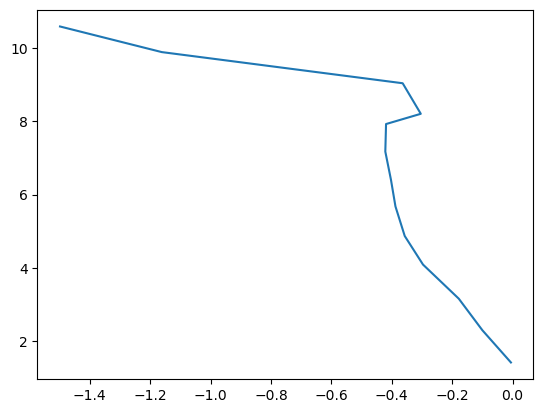

In [455]:
# Plot the trajectory
T_vec = np.array(T_vec)
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(T_vec[:, 0], T_vec[:, 1], T_vec[:, 2])
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.show()
i = 13
plt.plot(T_vec[:i, 0], T_vec[:i, 2])
print(T_vec[i])
plt.show()

In [268]:
vo.S
n_image = images[1]
# klt_params = {"winSize" : (15, 15), 
#                     "maxLevel" : 2, 
#                     "criteria" : (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)}
klt_params = {"winSize" : (4, 4), 
                    "maxLevel" : 2, 
                    "criteria" : (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 100, 0.003)}

new_kp, mask, err = cv2.calcOpticalFlowPyrLK(vo.prev_image, n_image, vo.S, None, **klt_params)

689